In [1]:
import act
import glob
import matplotlib.pyplot as plt
import matplotlib

In [5]:
files = glob.glob('cmscl6001_20230520_000526.nc')

In [6]:
ds = act.io.read_arm_netcdf(files)

In [7]:
ds

<xarray.Dataset> Size: 303kB
Dimensions:                            (time: 5, layer: 5, range: 3276)
Coordinates:
  * time                               (time) datetime64[ns] 40B 2023-05-20T0...
  * range                              (range) float64 26kB 0.0 ... 1.572e+04
  * layer                              (layer) float64 40B 1.0 2.0 3.0 4.0 5.0
    longitude                          float64 8B ...
    latitude                           float64 8B ...
Data variables: (12/26)
    cloud_base_heights                 (time, layer) float64 200B dask.array<chunksize=(1, 5), meta=np.ndarray>
    vertical_visibility                (time) float64 40B dask.array<chunksize=(5,), meta=np.ndarray>
    p_pol                              (time, range) float32 66kB dask.array<chunksize=(1, 3276), meta=np.ndarray>
    x_pol                              (time, range) float32 66kB dask.array<chunksize=(1, 3276), meta=np.ndarray>
    beta_att                           (time, range) float32 66kB dask.array<chunksize=(1, 3276), meta=np.ndarray>
    linear_depol_ratio                 (time, range) float32 66kB dask.array<chunksize=(1, 3276), meta=np.ndarray>
    ...                                 ...
    fog_detection                      (time) float32 20B dask.array<chunksize=(5,), meta=np.ndarray>
    receiver_gain                      (time) float32 20B dask.array<chunksize=(5,), meta=np.ndarray>
    range_resolution                   float32 4B ...
    cloud_calibration_factor           float64 8B ...
    cloud_calibration_factor_user      float64 8B ...
    overlap_function                   (range) float32 13kB dask.array<chunksize=(3276,), meta=np.ndarray>
Attributes: (12/18)
    title:                          CL61D CL61 with Depolarization
    institution:                    NEIU
    source:                         
    conventions:                    CF-1.8
    schema_version:                 1.3
    sw_version:                     1.2.7
    ...                             ...
    file_temporal_span_in_minutes:  5.0
    profile_interval_in_seconds:    60
    _file_dates:                    ['20230520']
    _file_times:                    ['000026']
    _datastream:                    act_datastream
    _arm_standards_flag:            0

In [8]:
ds.attrs['datastream'] = 'ceilometer.b1'

In [9]:
variables=['p_pol', 'x_pol', 'linear_depol_ratio']

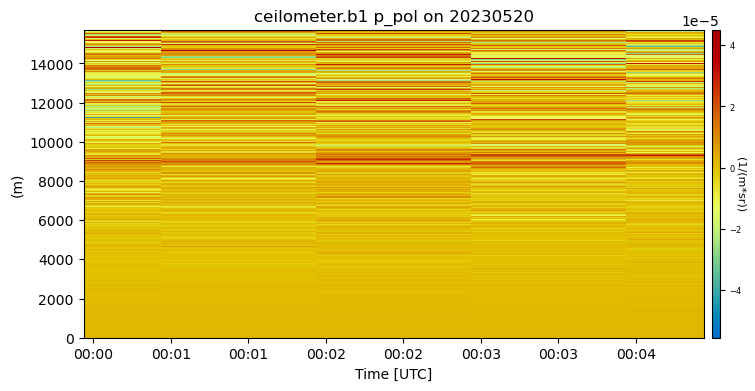

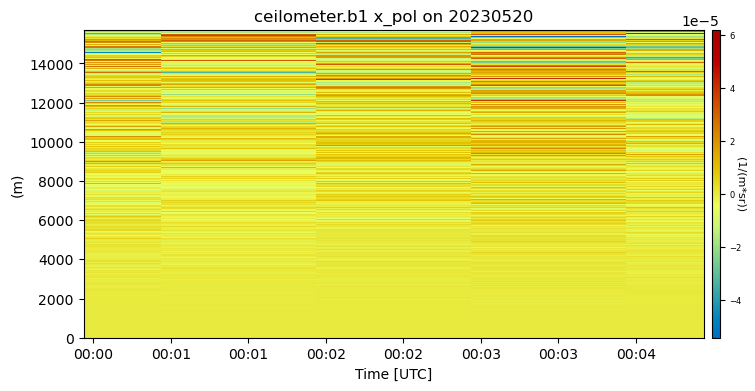

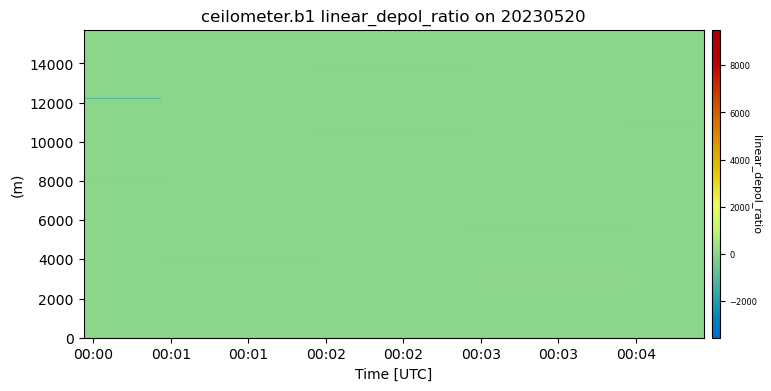

In [11]:
for variable in variables:
    display = act.plotting.TimeSeriesDisplay(ds, figsize=(8,4))
    if variable == 'backscatter':
        display.plot(variable,
                     cmap='Gray5',
                     vmin=0,
                     vmax=4,
                     y_rng=(0, ds.range.max().values))
    else:
        display.plot(variable,
                     cmap='HomeyerRainbow',
                     y_rng=(0, ds.range.max().values))

    plt.show()
    plt.close()